# County-level Data Sets
####  https://www.ers.usda.gov/data-products/county-level-data-sets/documentation/
####  https://data.world/finance/county-level-data-sets

## Introduction
The Economic Research Service [ERS] has compiled the latest data on Socioeconomic indicators like the poverty rate, population change, unemployment rate, and education levels across the nation into a mapping and data display/download application. It allows users to identify and compare States and counties on these indicators. The data are accessible via https://data.world/finance/county-level-data-sets. There are four excel files: Education, PopulationEstimates, PovertyEstimates and Unemployment. These files have been downloaded and in this projects I am trying to fit a model on the relevant attributes to find the percentage of poverty in each county.

## 1. Reading and Cleaning the Data

The first step is to read the data and transform them to DataFrame format which is much easier for manipulation. In this part, I first read these four tables and make a DataFrame of each one of them. Then I look at each DataFrame and its attributes and try to see which one of them is more relevant to our target and try to clean them.

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
 
file1 = r'Education.xls'
file2=r'PopulationEstimates.xls'
file3=r'Unemployment.xls'
file4=r'PovertyEstimates.xls'

df_education = pd.read_excel(file1)
df_population = pd.read_excel(file2, sheetname='Population Estimates 2010-2015')
df_unemployment = pd.read_excel(file3, sheetname='Unemployment Update')
df_poverty = pd.read_excel(file4, sheetname='Poverty Data 2014')



In [2]:
df_education.head(5)


,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2010-2014","High school diploma only, 2010-2014","Some college or associate's degree, 2010-2014","Bachelor's degree or higher, 2010-2014","Percent of adults with less than a high school diploma, 2010-2014","Percent of adults with a high school diploma only, 2010-2014","Percent of adults completing some college or associate's degree, 2010-2014","Percent of adults with a bachelor's degree or higher, 2010-2014"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,27.366,24.402,28587748.0,58440600.0,61206147.0,60821634.0,13.674676,27.954502,29.093447,29.277375
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,25.900,19.000,524368.0,999761.0,741813.0,951960.0,16.295338,31.068721,29.583250,23.052691
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,26.900,18.000,5012.0,12139.0,7950.0,11132.0,13.832694,33.502608,30.723374,21.941324
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,29.300,23.100,14615.0,38401.0,38147.0,42104.0,10.966706,28.815086,31.593718,28.624491
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,21.300,10.900,4790.0,6300.0,2563.0,5183.0,25.430028,33.446592,27.516458,13.606923






 
I use describe() and info() method to get more insight on the nature of this table.





In [3]:
df_education.describe()


,FIPS Code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2010-2014","High school diploma only, 2010-2014","Some college or associate's degree, 2010-2014","Bachelor's degree or higher, 2010-2014","Percent of adults with less than a high school diploma, 2010-2014","Percent of adults with a high school diploma only, 2010-2014","Percent of adults completing some college or associate's degree, 2010-2014","Percent of adults with a bachelor's degree or higher, 2010-2014"
count,3283.000000,3221.000000,3221.000000,3221.000000,3221.000000,3.186000e+03,3.186000e+03,3.186000e+03,3.186000e+03,3186.000000,...,3272.000000,3272.000000,3.273000e+03,3.273000e+03,3.273000e+03,3.273000e+03,3273.000000,3273.000000,3273.000000,3273.000000
mean,31308.280231,5.057125,5.371624,4.936976,5.187830,4.931574e+04,3.216389e+04,1.097056e+04,1.103321e+04,55.163671,...,25.994447,16.602638,2.662026e+04,5.396353e+04,5.645187e+04,5.606893e+04,15.360529,34.559736,29.846407,20.233328
std,16343.419770,2.701247,3.483776,2.724413,3.506753,9.474535e+05,6.193319e+05,2.120790e+05,2.129546e+05,12.804819,...,5.744861,7.753498,5.150521e+05,1.041323e+06,1.095131e+06,1.086387e+06,7.150254,7.046172,5.379334,8.889016
min,0.000000,1.000000,1.000000,1.000000,1.000000,6.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,11.800000,...,8.959627,4.900000,5.000000e+00,1.900000e+01,2.000000e+00,7.000000e+00,1.265823,8.694365,7.171503,2.631579
25%,19016.000000,3.000000,2.000000,2.000000,2.000000,3.020250e+03,1.264250e+03,3.760000e+02,2.780000e+02,45.500000,...,21.800000,11.300000,1.181000e+03,2.922000e+03,1.155000e+03,2.306000e+03,9.983506,29.945263,26.265651,14.020619
50%,30017.000000,6.000000,5.000000,6.000000,5.000000,6.031500e+03,2.794500e+03,8.100000e+02,6.100000e+02,53.700000,...,26.000000,14.600000,2.910000e+03,6.555000e+03,3.063000e+03,5.210000e+03,13.710836,34.837409,29.963017,18.140174
75%,46100.000000,7.000000,8.000000,7.000000,8.000000,1.246600e+04,7.169750e+03,2.154750e+03,1.819000e+03,65.700000,...,30.025000,19.500000,6.813000e+03,1.585100e+04,1.008800e+04,1.437900e+04,19.695031,39.539878,33.480154,24.018711
max,72153.000000,9.000000,12.000000,9.000000,12.000000,5.237331e+07,3.415805e+07,1.165073e+07,1.171727e+07,93.000000,...,44.900000,63.700000,2.858775e+07,5.844060e+07,6.120615e+07,6.082163e+07,53.281304,64.473684,46.527386,75.091491


In [4]:
df_education.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 47 columns):
FIPS Code                                                                     3283 non-null int64
State                                                                         3283 non-null object
Area name                                                                     3283 non-null object
2003 Rural-urban Continuum Code                                               3221 non-null float64
2003 Urban Influence Code                                                     3221 non-null float64
2013 Rural-urban Continuum Code                                               3221 non-null float64
2013 Urban Influence Code                                                     3221 non-null float64
Less than a high school diploma, 1970                                         3186 non-null float64
High school diploma only, 1970                                                3186 non-null float

Here I look to see whether any percentage is below than 0 or higher than 100, then it is an outlier. The results show that there is no outlier in the data.

In [5]:
for column in df_education.columns:
    if ("Percent" in column):
        if (df_education[column].min()<0 or df_education[column].max()>100):
            print(column)
    

In the education table we can see that the whole US data and also the whole states data also exist, but our goal is working on county level data. These mentioned rows of data have NaN rural, urban codes. So by eliminating the NaN data in rural urban code column we can get rid of the whole US and whole States data. Alo by looking at the columns we see that both the total numbers of adults having each category of degree and also percentage of them exist. We like to work with percentage instead of the total numbers. That's why I just use the ones that report the percentage of each degree for the reported years.

In [7]:
df_education_2=pd.DataFrame()
for column in df_education.columns:
    if (column=="FIPS Code" or column == "State" or column=="Area name" or "Code" in column or "Percent" in column ):


        df_education_2[column]=df_education[column]
        
df_education_2.head()        

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2010-2014","Percent of adults with a high school diploma only, 2010-2014","Percent of adults completing some college or associate's degree, 2010-2014","Percent of adults with a bachelor's degree or higher, 2010-2014"
0,0,US,United States,NaN,NaN,NaN,NaN,47.656,31.081,10.601,...,24.908,20.338,19.601,28.631,27.366,24.402,13.674676,27.954502,29.093447,29.277375
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,58.700,25.900,7.500,...,21.700,15.700,24.700,30.400,25.900,19.000,16.295338,31.068721,29.583250,23.052691
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,54.800,31.100,7.700,...,23.500,14.500,21.300,33.800,26.900,18.000,13.832694,33.502608,30.723374,21.941324
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,59.400,26.700,7.400,...,24.600,16.800,18.000,29.600,29.300,23.100,10.966706,28.815086,31.593718,28.624491
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,68.800,19.000,4.900,...,16.700,11.800,35.300,32.400,21.300,10.900,25.430028,33.446592,27.516458,13.606923


Also by looking at number of Null values in each column in df_education.info() we can see that there are less than 3% of Null values in each column and it's better if they are dropped from the analysis. Since the numbers may change a lot state by state and county by county, it's better if they get dropped instead of using some sort of average to fill the null values.
Here I will drop the null values.

In [9]:
df_education_2.dropna(inplace=True)
df_education_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 2 to 3203
Data columns (total 27 columns):
FIPS Code                                                                     3125 non-null int64
State                                                                         3125 non-null object
Area name                                                                     3125 non-null object
2003 Rural-urban Continuum Code                                               3125 non-null float64
2003 Urban Influence Code                                                     3125 non-null float64
2013 Rural-urban Continuum Code                                               3125 non-null float64
2013 Urban Influence Code                                                     3125 non-null float64
Percent of adults with less than a high school diploma, 1970                  3125 non-null float64
Percent of adults with a high school diploma only, 1970                       3125 non-null float

Now we see that by dropping the null values we have 3125 rows instead of 3283 rows and less than 5% of rows are dropped.

Now let's look at the PopulationEstimates data.

In [10]:
df_population.head()


,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.933509,3.030644,3.147241,3.567445,3.593568
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780127,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54571,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182265,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27457,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299


In [11]:
df_population.describe()


,FIPS,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,...,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015
count,3273.000000,3215.000000,3220.000000,3215.000000,3220.000000,3141.000000,3.273000e+03,3.273000e+03,3.273000e+03,3.273000e+03,...,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000
mean,31358.511763,5.053810,4.937888,5.366096,5.188820,1.807068,2.852679e+05,2.852816e+05,2.858184e+05,2.879664e+05,...,-1.638141,-2.526798,-1.287276,-2.270503,-1.361754,-0.658426,-1.448610,-0.203629,-1.042909,-0.101386
std,16305.188962,2.701246,2.724344,3.481577,3.506848,1.818262,5.517452e+06,5.517676e+06,5.528241e+06,5.571013e+06,...,10.404089,11.868250,12.183071,11.437064,12.297754,10.612967,12.226928,12.198762,11.472488,12.266461
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.200000e+01,8.200000e+01,8.300000e+01,9.000000e+01,...,-128.205128,-147.727273,-109.876862,-178.947368,-84.844838,-128.205128,-147.727273,-102.988031,-178.947368,-62.322703
25%,19025.000000,3.000000,2.000000,2.000000,2.000000,0.000000,1.156100e+04,1.157200e+04,1.155700e+04,1.149500e+04,...,-6.149600,-7.560724,-6.322240,-7.346978,-6.693453,-5.357553,-6.856850,-5.432753,-6.223266,-5.557048
50%,30021.000000,6.000000,6.000000,5.000000,5.000000,1.000000,2.694800e+04,2.694800e+04,2.687300e+04,2.681800e+04,...,-1.541227,-2.541636,-1.769747,-1.983769,-2.019663,-0.626174,-1.537988,-0.788296,-0.911948,-0.872527
75%,46101.000000,7.000000,7.000000,8.000000,8.000000,3.000000,7.031100e+04,7.040000e+04,7.060200e+04,7.066200e+04,...,2.900267,2.611355,3.392137,3.330672,3.793866,4.039957,3.962253,4.700267,4.574109,5.011510
max,72153.000000,9.000000,9.000000,12.000000,12.000000,5.000000,3.087455e+08,3.087581e+08,3.093469e+08,3.117189e+08,...,101.123596,119.193807,239.130435,146.367943,281.407035,101.123596,119.861185,239.130435,146.960126,281.407035


In [13]:
df_population.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Columns: 101 entries, FIPS to R_NET_MIG_2015
dtypes: float64(90), int64(9), object(2)
memory usage: 2.5+ MB


There is 101 columns in population data set. I looked at the data dictionary of this data set and tried to find the useful columns for this analysis. The goal is to estimate Poverty based on the other attriburtes. The poverty data we have is on 2014. In the population table we have population, birth, death, internatinal immigrations, domestic immigrations and other data from 2010 to 2015. Since our goal is to estimate poverty in 2014, that's why I choose population in 2014. Also, there are both the total numbers and rate for most attributes and I choose the rate which is a better attribute for this project.

The useful columns are:
    -The first 7 columns which are common between tables.
    
    -Economic_typology_2015: Each county in the U.S. is assigned one economic type. (Farming-dependent, Mining-dependent,
    Manufacturing-dependent, Federal/State government-dependent, Recreation, Nonspecialized) (https://www.ers.usda.gov/data-products/county-typology-codes/descriptions-and-maps.aspx)  There is no such data for 2014 and that's why I am using 2015.
    
    -POP_ESTIMATE_2014: (7/1/2014 resident total population estimate)
    
    -R_birth_2014: (Birth rate in period 7/1/2013 to 6/30/2014)
    
    -R_death_2014: (Death rate in period 7/1/2013 to 6/30/2014)
    
    -R_INTERNATIONAL_MIG_2014: (Net international migration rate in period 7/1/2013 to 6/30/2014)
    
    -R_DOMESTIC_MIG_2014: (Net domestic migration rate in period 7/1/2013 to 6/30/2014)

In [14]:
df_population_2=pd.DataFrame()
for column in df_population.columns:
    if (column in ["FIPS", "State" ,"Area_Name", "Economic_typology_2015", "POP_ESTIMATE_2014",  
                   "R_birth_2014","R_death_2014","R_INTERNATIONAL_MIG_2014","R_DOMESTIC_MIG_2014"] or "Code" in column or "Percent" in column ):


        df_population_2[column]=df_population[column]
        
df_population_2.head()  

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,POP_ESTIMATE_2014,R_birth_2014,R_death_2014,R_INTERNATIONAL_MIG_2014,R_DOMESTIC_MIG_2014
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,318907401,12.459909,8.220428,3.567445,0.000000
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4846411,12.056286,10.380963,1.142716,0.582002
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,55290,11.293597,9.136393,0.326300,2.265971
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,199713,11.072868,10.353587,1.073855,19.243287
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,26815,9.667584,11.526735,-0.074366,-3.904217


In [15]:
df_population_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Data columns (total 13 columns):
FIPS                               3273 non-null int64
State                              3273 non-null object
Area_Name                          3273 non-null object
Rural-urban_Continuum Code_2003    3215 non-null float64
Rural-urban_Continuum Code_2013    3220 non-null float64
Urban_Influence_Code_2003          3215 non-null float64
Urban_Influence_Code_2013          3220 non-null float64
Economic_typology_2015             3141 non-null float64
POP_ESTIMATE_2014                  3273 non-null int64
R_birth_2014                       3195 non-null float64
R_death_2014                       3195 non-null float64
R_INTERNATIONAL_MIG_2014           3195 non-null float64
R_DOMESTIC_MIG_2014                3195 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 332.5+ KB


In [16]:
df_population_2.describe()


,FIPS,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,POP_ESTIMATE_2014,R_birth_2014,R_death_2014,R_INTERNATIONAL_MIG_2014,R_DOMESTIC_MIG_2014
count,3273.000000,3215.000000,3220.000000,3215.000000,3220.000000,3141.000000,3.273000e+03,3195.000000,3195.000000,3195.000000,3195.000000
mean,31358.511763,5.053810,4.937888,5.366096,5.188820,1.807068,2.944675e+05,11.658922,9.766761,1.227594,-2.270503
std,16305.188962,2.701246,2.724344,3.481577,3.506848,1.818262,5.700613e+06,2.718995,2.573296,1.897098,11.437064
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.700000e+01,0.000000,0.000000,-18.262991,-178.947368
25%,19025.000000,3.000000,2.000000,2.000000,2.000000,0.000000,1.147800e+04,9.986448,8.131305,0.174470,-7.346978
50%,30021.000000,6.000000,6.000000,5.000000,5.000000,1.000000,2.701100e+04,11.495986,9.879592,0.605254,-1.983769
75%,46101.000000,7.000000,7.000000,8.000000,8.000000,3.000000,7.101200e+04,12.993880,11.502589,1.569910,3.330672
max,72153.000000,9.000000,9.000000,12.000000,12.000000,5.000000,3.189074e+08,29.380681,20.708637,23.827477,146.367943


Again in this table it's better to drop the NaN values because there is less than 4 percent of them in each column. Also, because the data is very different state by state and county by county it's better if we don't use the average for the missing values. Let's see if we drop all the NaN values how much of data are dropped.

In [17]:
df_population_2.dropna(inplace=True)
df_population_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 2 to 3193
Data columns (total 13 columns):
FIPS                               3136 non-null int64
State                              3136 non-null object
Area_Name                          3136 non-null object
Rural-urban_Continuum Code_2003    3136 non-null float64
Rural-urban_Continuum Code_2013    3136 non-null float64
Urban_Influence_Code_2003          3136 non-null float64
Urban_Influence_Code_2013          3136 non-null float64
Economic_typology_2015             3136 non-null float64
POP_ESTIMATE_2014                  3136 non-null int64
R_birth_2014                       3136 non-null float64
R_death_2014                       3136 non-null float64
R_INTERNATIONAL_MIG_2014           3136 non-null float64
R_DOMESTIC_MIG_2014                3136 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 343.0+ KB


So about 95.8 percent of data is saved and less than 4% is dropped.

Now let's look at the Unemployment data.

In [18]:
df_unemployment.head()

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2003,Urban_influence_code_2003,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,...,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Median_Household_Income_2014,Med_HH_Income_Percent_of_State_Total_2014
0,1000,AL,Alabama,NaN,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,...,2161313.0,2014284.0,147029.0,6.8,2146157.0,2015189.0,130968.0,6.1,42917.0,100.0
1,1001,AL,"Autauga County, AL",2.0,2.0,2.0,2.0,24383.0,23577.0,806.0,...,25597.0,24097.0,1500.0,5.9,25308.0,23981.0,1327.0,5.2,54366.0,126.7
2,1003,AL,"Baldwin County, AL",4.0,5.0,3.0,2.0,82659.0,80099.0,2560.0,...,86400.0,81084.0,5316.0,6.2,87316.0,82525.0,4791.0,5.5,49626.0,115.6
3,1005,AL,"Barbour County, AL",6.0,6.0,6.0,6.0,10334.0,9684.0,650.0,...,8849.0,7913.0,936.0,10.6,8625.0,7854.0,771.0,8.9,34971.0,81.5
4,1007,AL,"Bibb County, AL",1.0,1.0,1.0,1.0,8791.0,8432.0,359.0,...,8560.0,7942.0,618.0,7.2,8490.0,7929.0,561.0,6.6,39546.0,92.1


In [19]:
df_unemployment.describe()

,FIPS_Code,Rural_urban_continuum_code_2003,Urban_influence_code_2003,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,...,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Median_Household_Income_2014,Med_HH_Income_Percent_of_State_Total_2014
count,3275.000000,3218.000000,3218.000000,3220.000000,3220.000000,3.269000e+03,3.269000e+03,3269.000000,3269.000000,3.269000e+03,...,3.271000e+03,3.271000e+03,3.271000e+03,3271.000000,3.271000e+03,3.271000e+03,3.271000e+03,3271.000000,3193.000000,3193.000000
mean,31337.522748,5.056868,5.372592,4.939752,5.191925,9.396057e+04,8.956161e+04,4398.955338,5.064240,9.489576e+04,...,9.624025e+04,9.025032e+04,5.989932e+03,6.496423,9.684514e+04,9.168503e+04,5.160104e+03,5.738153,47236.879111,91.163013
std,16320.226659,2.701995,3.485940,2.725070,3.508450,5.662391e+05,5.390045e+05,27607.873029,2.124838,5.731828e+05,...,5.901497e+05,5.517947e+05,3.888034e+04,2.862113,5.939606e+05,5.613048e+05,3.302136e+04,2.465701,12099.233818,19.562482
min,1000.000000,1.000000,1.000000,1.000000,1.000000,4.100000e+01,3.800000e+01,3.000000,1.500000,4.300000e+01,...,7.800000e+01,7.400000e+01,4.000000e+00,1.200000,7.800000e+01,7.400000e+01,4.000000e+00,1.800000,21658.000000,42.400000
25%,19022.000000,3.000000,2.000000,2.000000,2.000000,5.292000e+03,5.032000e+03,261.000000,3.700000,5.322000e+03,...,5.053500e+03,4.709500e+03,3.225000e+02,4.700000,5.049500e+03,4.742000e+03,2.880000e+02,4.200000,39005.000000,78.400000
50%,30019.000000,6.000000,5.000000,6.000000,5.000000,1.239600e+04,1.171200e+04,650.000000,4.700000,1.248000e+04,...,1.171300e+04,1.087100e+04,8.170000e+02,6.100000,1.167900e+04,1.100000e+04,7.090000e+02,5.300000,45380.000000,88.800000
75%,46100.000000,7.000000,8.000000,7.000000,8.000000,3.309500e+04,3.161700e+04,1720.000000,5.800000,3.334300e+04,...,3.263850e+04,3.076050e+04,2.131500e+03,7.650000,3.290500e+04,3.104500e+04,1.860000e+03,6.600000,52650.000000,100.500000
max,72153.000000,9.000000,12.000000,9.000000,12.000000,1.789308e+07,1.693159e+07,961490.000000,20.400000,1.817812e+07,...,1.882792e+07,1.741804e+07,1.409883e+06,26.300000,1.898177e+07,1.779861e+07,1.183156e+06,24.300000,125635.000000,241.600000


In [20]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 45 columns):
FIPS_Code                                    3275 non-null int64
State                                        3275 non-null object
Area_name                                    3274 non-null object
Rural_urban_continuum_code_2003              3218 non-null float64
Urban_influence_code_2003                    3218 non-null float64
Rural_urban_continuum_code_2013              3220 non-null float64
Urban_influence_code_2013                    3220 non-null float64
Civilian_labor_force_2007                    3269 non-null float64
Employed_2007                                3269 non-null float64
Unemployed_2007                              3269 non-null float64
Unemployment_rate_2007                       3269 non-null float64
Civilian_labor_force_2008                    3269 non-null float64
Employed_2008                                3269 non-null float64
Unemployed_2008           

By looking at the columns of the unemployment table, we can see that there is civilian labor force, unemployed and employed, and rate of unployment from 2007 to 2015 and also at the end there is median household income for 2014 and County Household Median Income as a percent of the State Total Median Household Income. Since the poverty we are estimating is for 2014 here I just use 2014 labor force and rate of unemployment along with median household and percent of county household median income to the whole state median income.


In [21]:
df_unemployment_2=pd.DataFrame()
for column in df_unemployment.columns:
    if (column in ["FIPS_Code", "State" ,"Area_name", "Civilian_labor_force_2014", "Unemployment_rate_2014",  
                   "Median_Household_Income_2014","Med_HH_Income_Percent_of_State_Total_2014"] or "code" in column): 

        df_unemployment_2[column]=df_unemployment[column]
        
df_unemployment_2.head()  

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2003,Urban_influence_code_2003,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Civilian_labor_force_2014,Unemployment_rate_2014,Median_Household_Income_2014,Med_HH_Income_Percent_of_State_Total_2014
0,1000,AL,Alabama,NaN,NaN,NaN,NaN,2161313.0,6.8,42917.0,100.0
1,1001,AL,"Autauga County, AL",2.0,2.0,2.0,2.0,25597.0,5.9,54366.0,126.7
2,1003,AL,"Baldwin County, AL",4.0,5.0,3.0,2.0,86400.0,6.2,49626.0,115.6
3,1005,AL,"Barbour County, AL",6.0,6.0,6.0,6.0,8849.0,10.6,34971.0,81.5
4,1007,AL,"Bibb County, AL",1.0,1.0,1.0,1.0,8560.0,7.2,39546.0,92.1


In [22]:
df_unemployment_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 11 columns):
FIPS_Code                                    3275 non-null int64
State                                        3275 non-null object
Area_name                                    3274 non-null object
Rural_urban_continuum_code_2003              3218 non-null float64
Urban_influence_code_2003                    3218 non-null float64
Rural_urban_continuum_code_2013              3220 non-null float64
Urban_influence_code_2013                    3220 non-null float64
Civilian_labor_force_2014                    3271 non-null float64
Unemployment_rate_2014                       3271 non-null float64
Median_Household_Income_2014                 3193 non-null float64
Med_HH_Income_Percent_of_State_Total_2014    3193 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 281.5+ KB


Again in this table it's better to drop the NaN values because there is less than 2.6 percent of them in each column. Also, because the data is very different state by state and county by county it's better if we don't use the average for the missing values. Let's see if we drop all the NaN values how much of data are dropped.

In [23]:
df_unemployment_2.dropna(inplace=True)
df_unemployment_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 1 to 3195
Data columns (total 11 columns):
FIPS_Code                                    3136 non-null int64
State                                        3136 non-null object
Area_name                                    3136 non-null object
Rural_urban_continuum_code_2003              3136 non-null float64
Urban_influence_code_2003                    3136 non-null float64
Rural_urban_continuum_code_2013              3136 non-null float64
Urban_influence_code_2013                    3136 non-null float64
Civilian_labor_force_2014                    3136 non-null float64
Unemployment_rate_2014                       3136 non-null float64
Median_Household_Income_2014                 3136 non-null float64
Med_HH_Income_Percent_of_State_Total_2014    3136 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 294.0+ KB


We can see that by dropping the NaN values we still have about 96% of the data.

Now let's look at the Poverty data.

In [24]:
df_poverty.head()

,FIPStxt,State,Area_Name,Rural_urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural_urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2014,CI90LBAll_2014,CI90UBALL_2014,...,CI90UB517P_2014,MEDHHINC_2014,CI90LBINC_2014,CI90UBINC_2014,POV05_2014,CI90LB05_2014,CI90UB05_2014,PCTPOV05_2014,CI90LB05P_2014,CI90UB05P_2014
0,0,US,United States,NaN,NaN,NaN,NaN,48208387.0,47966830.0,48449944.0,...,20.6,53657.0,53564.0,53750.0,4658187.0,4609104.0,4707270.0,23.9,23.7,24.1
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,905682.0,888317.0,923047.0,...,26.8,42917.0,42335.0,43499.0,88203.0,83938.0,92468.0,30.6,29.1,32.1
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,7204.0,5845.0,8563.0,...,21.3,54366.0,50916.0,57816.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,25696.0,21539.0,29853.0,...,22.8,49626.0,46516.0,52736.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,5943.0,4539.0,7347.0,...,45.3,34971.0,32475.0,37467.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_poverty.describe()

,FIPStxt,Rural_urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural_urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2014,CI90LBAll_2014,CI90UBALL_2014,PCTPOVALL_2014,CI90LBALLP_2014,...,CI90UB517P_2014,MEDHHINC_2014,CI90LBINC_2014,CI90UBINC_2014,POV05_2014,CI90LB05_2014,CI90UB05_2014,PCTPOV05_2014,CI90LB05P_2014,CI90UB05P_2014
count,3194.000000,3137.000000,3137.000000,3142.000000,3142.000000,3.193000e+03,3.193000e+03,3.193000e+03,3193.000000,3193.000000,...,3193.00000,3193.000000,3193.000000,3193.000000,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,52.000000,52.000000
mean,30351.455542,5.125598,5.448518,5.008593,5.267664,4.529444e+04,4.345273e+04,4.713615e+04,16.813028,13.865894,...,26.86580,47244.013467,43701.077983,50786.948951,1.791611e+05,1.741971e+05,1.841250e+05,22.928846,21.473077,24.384615
std,15178.984141,2.682409,3.469250,2.708411,3.499302,8.743764e+05,8.696713e+05,8.790888e+05,6.425157,5.422537,...,10.41431,12096.299933,11797.010473,12499.941804,6.431435e+05,6.365185e+05,6.497742e+05,5.386451,5.394119,5.430393
min,0.000000,1.000000,1.000000,1.000000,1.000000,8.000000e+00,6.000000e+00,1.000000e+01,3.200000,2.400000,...,3.70000,21658.000000,19379.000000,23937.000000,5.157000e+03,4.469000e+03,5.845000e+03,14.300000,12.900000,15.500000
25%,18171.500000,3.000000,2.000000,2.000000,2.000000,1.817000e+03,1.434000e+03,2.192000e+03,12.100000,9.800000,...,19.20000,39006.000000,35663.000000,42422.000000,2.434925e+04,2.245825e+04,2.624025e+04,17.400000,15.975000,19.275000
50%,29174.000000,6.000000,5.000000,6.000000,5.000000,4.415000e+03,3.606000e+03,5.243000e+03,15.800000,13.200000,...,25.70000,45400.000000,41867.000000,48828.000000,5.931700e+04,5.548500e+04,6.314900e+04,23.200000,22.300000,24.400000
75%,45074.500000,7.000000,8.000000,7.000000,8.000000,1.122800e+04,9.423000e+03,1.299000e+04,20.300000,16.900000,...,33.50000,52662.000000,49130.000000,56588.000000,1.063635e+05,1.010558e+05,1.116712e+05,26.800000,25.825000,28.200000
max,56045.000000,9.000000,12.000000,9.000000,12.000000,4.820839e+07,4.796683e+07,4.844994e+07,52.200000,45.300000,...,67.70000,125635.000000,119393.000000,138668.000000,4.658187e+06,4.609104e+06,4.707270e+06,33.300000,31.400000,35.200000


In [26]:
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 34 columns):
FIPStxt                            3194 non-null int64
State                              3194 non-null object
Area_Name                          3194 non-null object
Rural_urban_Continuum_Code_2003    3137 non-null float64
Urban_Influence_Code_2003          3137 non-null float64
Rural_urban_Continuum_Code_2013    3142 non-null float64
Urban_Influence_Code_2013          3142 non-null float64
POVALL_2014                        3193 non-null float64
CI90LBAll_2014                     3193 non-null float64
CI90UBALL_2014                     3193 non-null float64
PCTPOVALL_2014                     3193 non-null float64
CI90LBALLP_2014                    3193 non-null float64
CI90UBALLP_2014                    3193 non-null float64
POV017_2014                        3193 non-null float64
CI90LB017_2014                     3193 non-null float64
CI90UB017_2014                     3193 no

By looking at the data dictionary for poverty table we can see that there is estimated of poverty, percentage of people in poverty and also the lower bound and upper bound of these estimation. Also there are age categories for these numbers, like under 5 years old in poverty, 5 to 17 years old in poverty and ... and also estimation of all ages. Because so far in other tables we didn't have attributes based on age categories, here I will just use all ages category. There is also median household income in this table but it also exist in unemployment table and that's why we don't use it in this table.

In [27]:
df_poverty_2=pd.DataFrame()
for column in df_poverty.columns:
    if (column in ["FIPStxt", "State" ,"Area_Name", "POVALL_2014", "PCTPOVALL_2014"] or "Code" in column): 

        df_poverty_2[column]=df_poverty[column]
        
df_poverty_2.head()  

,FIPStxt,State,Area_Name,Rural_urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural_urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2014,PCTPOVALL_2014
0,0,US,United States,NaN,NaN,NaN,NaN,48208387.0,15.5
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,905682.0,19.2
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,7204.0,13.1
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,25696.0,13.0
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,5943.0,25.4


In [28]:
df_poverty_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 9 columns):
FIPStxt                            3194 non-null int64
State                              3194 non-null object
Area_Name                          3194 non-null object
Rural_urban_Continuum_Code_2003    3137 non-null float64
Urban_Influence_Code_2003          3137 non-null float64
Rural_urban_Continuum_Code_2013    3142 non-null float64
Urban_Influence_Code_2013          3142 non-null float64
POVALL_2014                        3193 non-null float64
PCTPOVALL_2014                     3193 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 224.7+ KB


Again in this table it's better to drop the NaN values because there is less than 1.8 percent of them in each column. Also, because the data is very different state by state and county by county it's better if we don't use the average for the missing values. Let's see if we drop all the NaN values how much of data are missed.

In [29]:
df_poverty_2.dropna(inplace=True)
df_poverty_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 2 to 3193
Data columns (total 9 columns):
FIPStxt                            3136 non-null int64
State                              3136 non-null object
Area_Name                          3136 non-null object
Rural_urban_Continuum_Code_2003    3136 non-null float64
Urban_Influence_Code_2003          3136 non-null float64
Rural_urban_Continuum_Code_2013    3136 non-null float64
Urban_Influence_Code_2013          3136 non-null float64
POVALL_2014                        3136 non-null float64
PCTPOVALL_2014                     3136 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 245.0+ KB


We see that just 2 percent of data is missed by droping the NaN values which is not too high.

Area_name and Rural-urban continuum and influence codes are the same between tables but sometimes the naming is a little bit different. Like in Area_name sometimes they put state name at the end and sometimes they don't. So it's better if ther are dropped in all tables except education and then after merging we have these attributes which are part of the education table.

In [30]:
df_poverty_2.drop(['Area_Name', 'Rural_urban_Continuum_Code_2003','Urban_Influence_Code_2003','Rural_urban_Continuum_Code_2013','Urban_Influence_Code_2013'],axis=1, inplace=True)
df_unemployment_2.drop(['Area_name', 'Rural_urban_continuum_code_2003','Urban_influence_code_2003','Rural_urban_continuum_code_2013','Urban_influence_code_2013'],axis=1, inplace=True)
df_population_2.drop(['Area_Name', 'Rural-urban_Continuum Code_2003','Urban_Influence_Code_2003','Rural-urban_Continuum Code_2013','Urban_Influence_Code_2013'],axis=1, inplace=True)

FIPS code are common between tables but the naming might be different. Here, I am changing all the names to 'FIPS'.

In [31]:
df_poverty_2.rename(columns={'FIPStxt': 'FIPS'}, inplace=True)
df_unemployment_2.rename(columns={'FIPS_Code': 'FIPS'}, inplace=True)
df_population_2.rename(columns={'FIPStxt': 'FIPS'}, inplace=True)
df_education_2.rename(columns={'FIPS Code': 'FIPS'}, inplace=True)

Here I am joining all the tables on FIPS and State and save the joined table as a csv file. Then we read this file and work with that.

In [36]:
df_joined= df_education_2.merge(df_population_2,on=['FIPS' , 'State']).merge(df_unemployment_2,on=['FIPS' , 'State']).merge(df_poverty_2,on=['FIPS' , 'State'])
df_joined.to_csv('joined_dataframe.csv') 


In [37]:
file1 = r'joined_dataframe.csv'

df = pd.read_csv(file1)
df.head()

,Unnamed: 0,FIPS,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970",...,R_birth_2014,R_death_2014,R_INTERNATIONAL_MIG_2014,R_DOMESTIC_MIG_2014,Civilian_labor_force_2014,Unemployment_rate_2014,Median_Household_Income_2014,Med_HH_Income_Percent_of_State_Total_2014,POVALL_2014,PCTPOVALL_2014
0,0,1001,AL,Autauga County,2.0,2.0,2.0,2.0,54.8,31.1,...,11.293597,9.136393,0.326300,2.265971,25597.0,5.9,54366.0,126.7,7204.0,13.1
1,1,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,59.4,26.7,...,11.072868,10.353587,1.073855,19.243287,86400.0,6.2,49626.0,115.6,25696.0,13.0
2,2,1005,AL,Barbour County,6.0,6.0,6.0,6.0,68.8,19.0,...,9.667584,11.526735,-0.074366,-3.904217,8849.0,10.6,34971.0,81.5,5943.0,25.4
3,3,1007,AL,Bibb County,1.0,1.0,1.0,1.0,73.1,19.4,...,10.962917,9.365083,0.932070,-0.177537,8560.0,7.2,39546.0,92.1,3666.0,18.1
4,4,1009,AL,Blount County,1.0,1.0,1.0,1.0,70.5,22.7,...,10.711314,10.208680,0.485302,-2.062535,24532.0,6.2,45567.0,106.2,10000.0,17.5


In [38]:
df.columns

Index(['Unnamed: 0', 'FIPS', 'State', 'Area name',
       '2003 Rural-urban Continuum Code', '2003 Urban Influence Code',
       '2013 Rural-urban Continuum Code', '2013 Urban Influence Code',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adults completing some college (1-3 years), 1980',
       'Percent of adults completing four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1990',
       'Percent of adults with a high school diploma only, 1990',
       'Percent of adults completing some college or associate's degree, 1990',
       'Percent of adu

Here again I drop some columns that seem unreasonable to be part of analysis. we have rural-urban codes for 2013 so probably 2003 is unnecessary. Also, we don't need to have FIPS as an attribute because it's just a code showing the county. Also, having the area name as an attribute will be very computationally expensive since there are more than 3000 of them and with one-hot encoding we will end up having more than 3000 attributes just for area-name. We have other characteristics of each county that are good representatives. Also, we have the median income of each county and also the state as an attribute, so having the percentage of the median income by each county to the whole state seems to be unnecessary. Also, we have rate of people in poverty which is a better target attribute comparing with the total number of people in poverty. So, we are droping the total number of people in poverty from the attributes.

In [39]:
df.drop(['Unnamed: 0', 'FIPS', 'Area name', '2003 Rural-urban Continuum Code', '2003 Urban Influence Code',
         'Med_HH_Income_Percent_of_State_Total_2014', 'POVALL_2014' ], axis=1, inplace=True)
df.head()

,State,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980",...,Economic_typology_2015,POP_ESTIMATE_2014,R_birth_2014,R_death_2014,R_INTERNATIONAL_MIG_2014,R_DOMESTIC_MIG_2014,Civilian_labor_force_2014,Unemployment_rate_2014,Median_Household_Income_2014,PCTPOVALL_2014
0,AL,2.0,2.0,54.8,31.1,7.7,6.4,40.6,35.2,12.1,...,0.0,55290,11.293597,9.136393,0.326300,2.265971,25597.0,5.9,54366.0,13.1
1,AL,3.0,2.0,59.4,26.7,7.4,6.5,39.7,33.7,14.5,...,5.0,199713,11.072868,10.353587,1.073855,19.243287,86400.0,6.2,49626.0,13.0
2,AL,6.0,6.0,68.8,19.0,4.9,7.3,55.1,26.1,9.7,...,3.0,26815,9.667584,11.526735,-0.074366,-3.904217,8849.0,10.6,34971.0,25.4
3,AL,1.0,1.0,73.1,19.4,3.3,4.2,59.5,29.6,6.1,...,0.0,22549,10.962917,9.365083,0.932070,-0.177537,8560.0,7.2,39546.0,18.1
4,AL,1.0,1.0,70.5,22.7,4.1,2.7,53.9,32.4,8.4,...,0.0,57658,10.711314,10.208680,0.485302,-2.062535,24532.0,6.2,45567.0,17.5


Here I am converting the numbers to percentage numbers. Most of them should be devided by 100. However for birth rate, death rate, international migration rate and domestic migration rate we should devide the numbers by 1000 to get the percentage of the numbers. (I looked at the tables to figure them out.)
Also, the summation of attributes showing percentage of people having each category of degree for each reported year will be 100, so all five of them are not necessary. It's better to delete one of them, otherwise the correlation of these attributes will be very high. That's why I am dropping attributes showing the percentage of people with less than a high school degree.

In [40]:
for column in df:
    if (column in ["Unemployment_rate_2014","PCTPOVALL_2014"] or "Percent" in column): 

        df[column]=df[column]/100
        
    if (column in ["R_birth_2014", "R_death_2014", "R_INTERNATIONAL_MIG_2014", "R_DOMESTIC_MIG_2014"]): 

        df[column]=df[column]/1000  
        
    if  "with less than a high school" in column:
        df.drop(column,axis=1, inplace=True)
        
df.head()  

,State,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with a high school diploma only, 1990",...,Economic_typology_2015,POP_ESTIMATE_2014,R_birth_2014,R_death_2014,R_INTERNATIONAL_MIG_2014,R_DOMESTIC_MIG_2014,Civilian_labor_force_2014,Unemployment_rate_2014,Median_Household_Income_2014,PCTPOVALL_2014
0,AL,2.0,2.0,0.311,0.077,0.064,0.352,0.121,0.121,0.320,...,0.0,55290,0.011294,0.009136,0.000326,0.002266,25597.0,0.059,54366.0,0.131
1,AL,3.0,2.0,0.267,0.074,0.065,0.337,0.145,0.121,0.318,...,5.0,199713,0.011073,0.010354,0.001074,0.019243,86400.0,0.062,49626.0,0.130
2,AL,6.0,6.0,0.190,0.049,0.073,0.261,0.097,0.092,0.271,...,3.0,26815,0.009668,0.011527,-0.000074,-0.003904,8849.0,0.106,34971.0,0.254
3,AL,1.0,1.0,0.194,0.033,0.042,0.296,0.061,0.049,0.338,...,0.0,22549,0.010963,0.009365,0.000932,-0.000178,8560.0,0.072,39546.0,0.181
4,AL,1.0,1.0,0.227,0.041,0.027,0.324,0.084,0.053,0.347,...,0.0,57658,0.010711,0.010209,0.000485,-0.002063,24532.0,0.062,45567.0,0.175


## 2. Splitting data into Train Data Sets and Test Data Sets

Here I split the data into 80% train data and 20% test data. I put the test data set aside and just play around with train data set. At the end when I choose my models and train them then I use the test data sets to estimate the errors on them.

In [41]:
import os
from sklearn.model_selection import train_test_split

Train_FILE = 'Train_Set.csv'
Test_FILE =  'Test_Set.csv'


train_set, test_set = train_test_split(df, test_size=0.2, random_state=1234)

train_set.to_csv(Train_FILE) 
test_set.to_csv(Test_FILE) 

In [42]:
train_set.head()

,State,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with a high school diploma only, 1990",...,Economic_typology_2015,POP_ESTIMATE_2014,R_birth_2014,R_death_2014,R_INTERNATIONAL_MIG_2014,R_DOMESTIC_MIG_2014,Civilian_labor_force_2014,Unemployment_rate_2014,Median_Household_Income_2014,PCTPOVALL_2014
287,CO,9.0,10.0,0.307,0.103,0.175,0.398,0.177,0.243,0.320,...,5.0,719,0.005642,0.001410,0.000000,0.021157,477.0,0.052,40006.0,0.155
516,GA,3.0,2.0,0.113,0.044,0.022,0.233,0.052,0.051,0.323,...,2.0,8354,0.009146,0.011997,0.000713,-0.013066,2999.0,0.112,36886.0,0.281
2502,TN,8.0,6.0,0.176,0.023,0.024,0.287,0.048,0.050,0.378,...,4.0,16842,0.009007,0.011437,0.000000,-0.000830,6473.0,0.086,33573.0,0.233
2731,TX,7.0,8.0,0.232,0.076,0.064,0.310,0.122,0.097,0.322,...,3.0,32487,0.015028,0.007775,0.001537,-0.012539,12909.0,0.063,40680.0,0.206
1244,MI,5.0,8.0,0.352,0.138,0.105,0.371,0.209,0.191,0.322,...,5.0,90796,0.010754,0.009017,0.000254,0.006295,48168.0,0.060,55592.0,0.097


## 3. Exploratory Data Analysis¶

Here I try to do exploratory data analysis by looking at the data and building some graphs.

First, I look at histogram of each attribute.

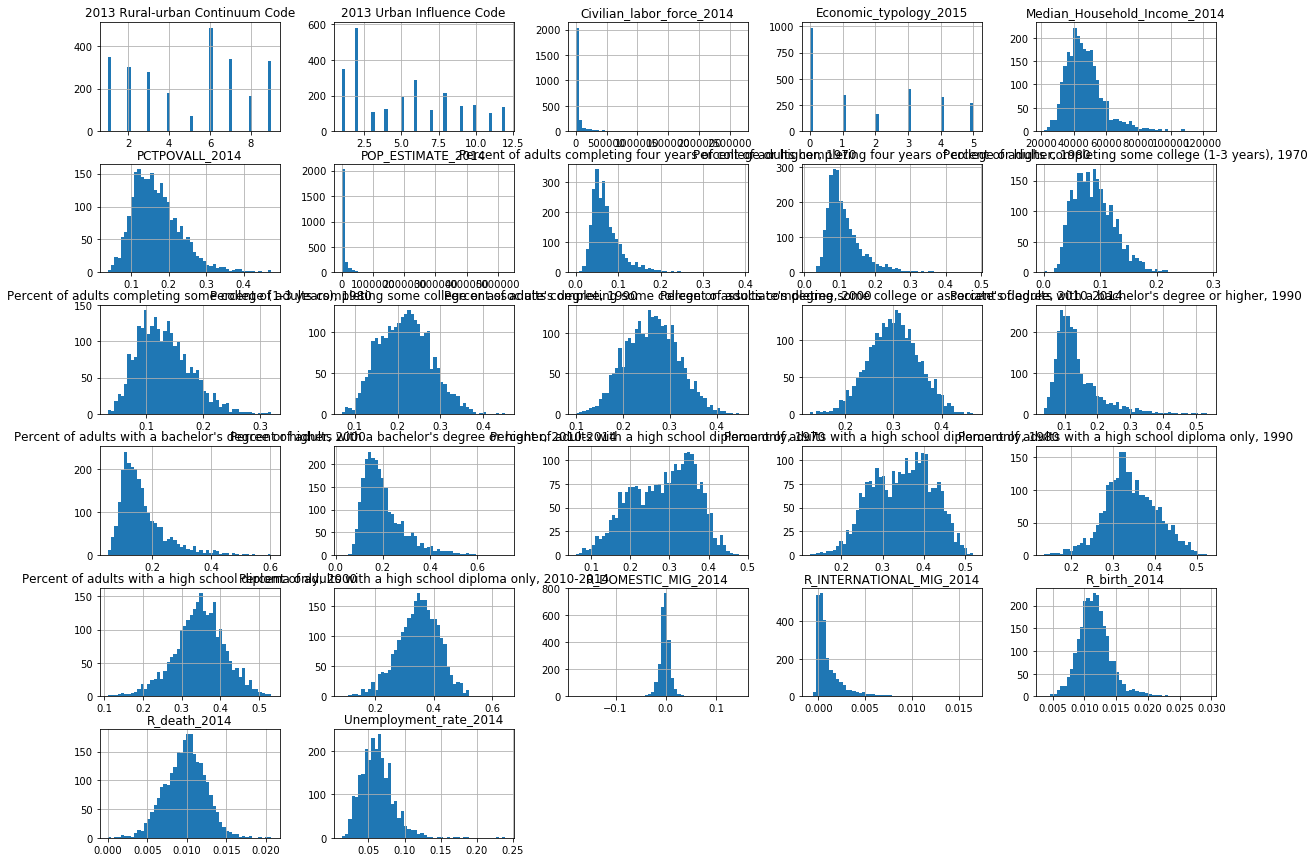

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
plt.show()

Here I look at the poverty rate box plot for each state. From this figure we can see that the poverty rate can be very different state by state. 

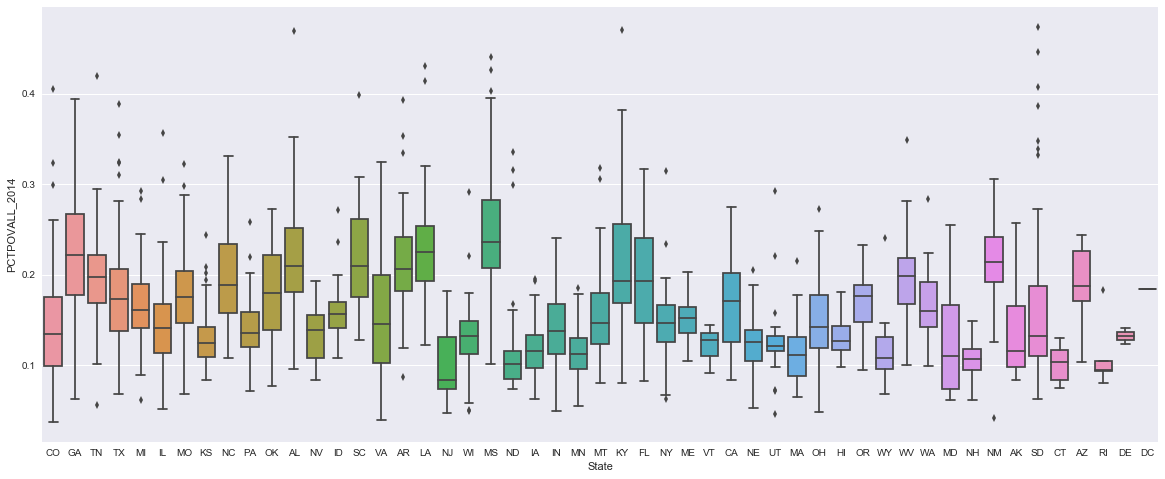

In [44]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(20,8))
state_hist = sb.boxplot(x="State", y="PCTPOVALL_2014", data=train_set)

Here I look at the poverty rate swarmplot for each state which is a nice plot. However it is somehow similar to the above figure.

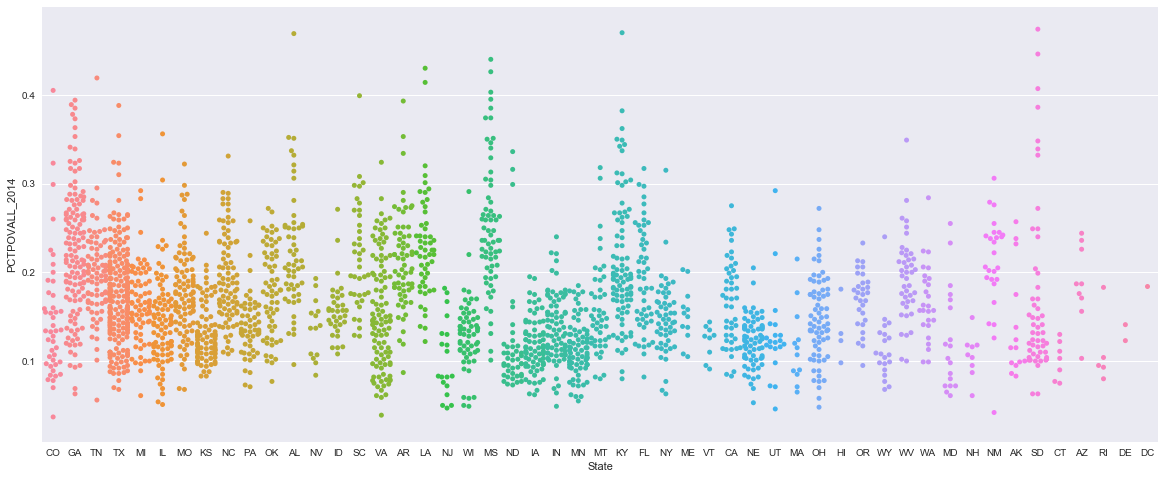

In [45]:
fig, ax = plt.subplots(figsize=(20,8))
sb.swarmplot(x="State", y="PCTPOVALL_2014", data=train_set)

Now to see if there is a noticeable relationship between the target and the attributes, I plot the scatter plot between them. These scatter plots are very useful.

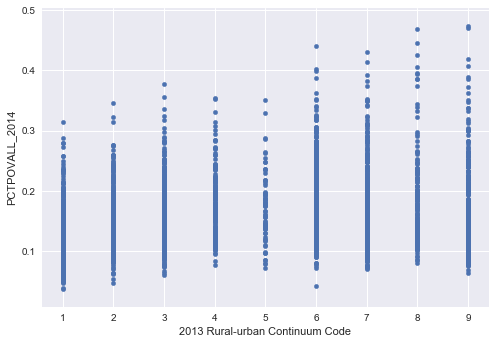

In [48]:
train_set. plot.scatter(x='2013 Rural-urban Continuum Code', y='PCTPOVALL_2014');

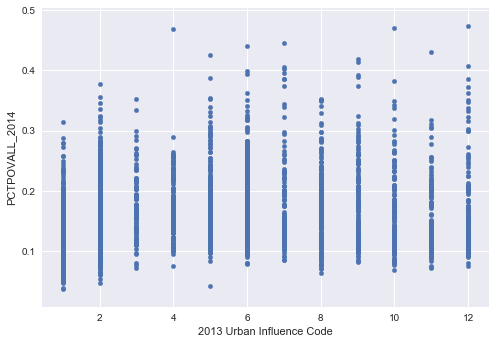

In [49]:
train_set. plot.scatter(x='2013 Urban Influence Code', y='PCTPOVALL_2014');

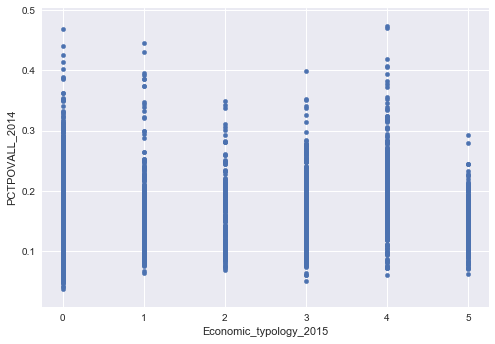

In [50]:
train_set. plot.scatter(x='Economic_typology_2015', y='PCTPOVALL_2014');

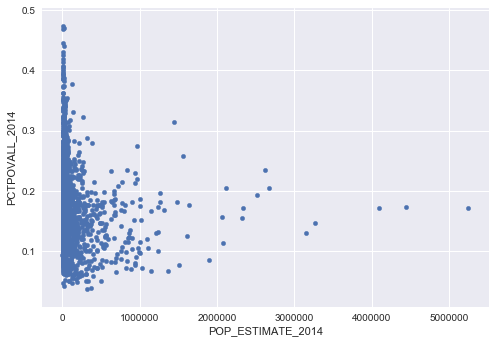

In [51]:
train_set. plot.scatter(x='POP_ESTIMATE_2014', y='PCTPOVALL_2014');

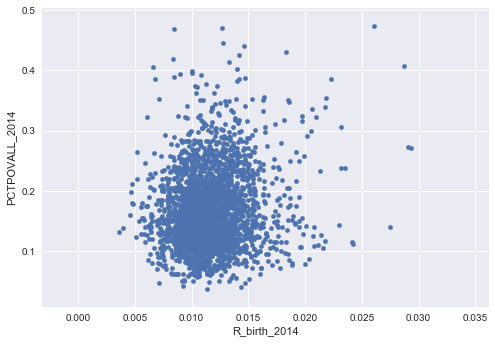

In [52]:
train_set. plot.scatter(x='R_birth_2014', y='PCTPOVALL_2014');

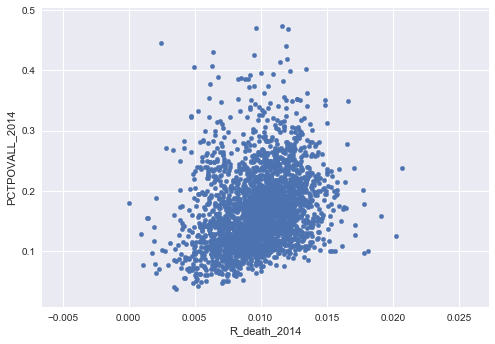

In [53]:
train_set. plot.scatter(x='R_death_2014', y='PCTPOVALL_2014');

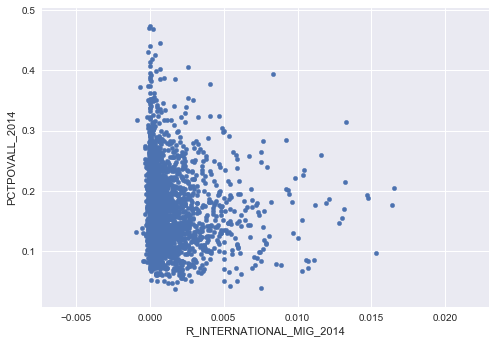

In [54]:
train_set. plot.scatter(x='R_INTERNATIONAL_MIG_2014', y='PCTPOVALL_2014');

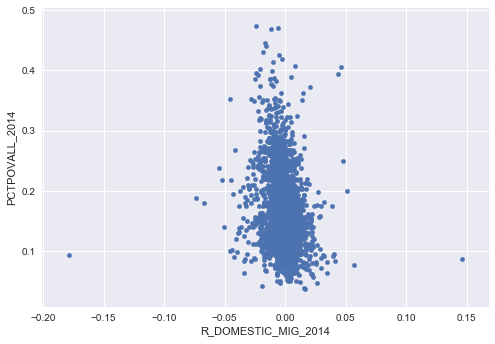

In [55]:
train_set. plot.scatter(x='R_DOMESTIC_MIG_2014', y='PCTPOVALL_2014');

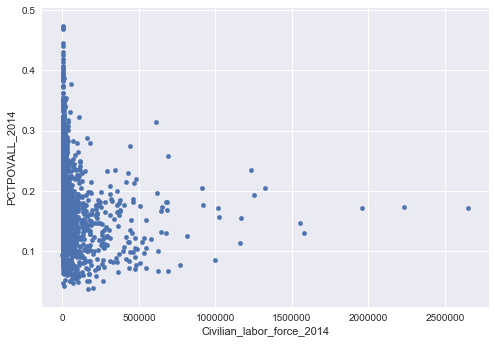

In [56]:
train_set. plot.scatter(x='Civilian_labor_force_2014', y='PCTPOVALL_2014');

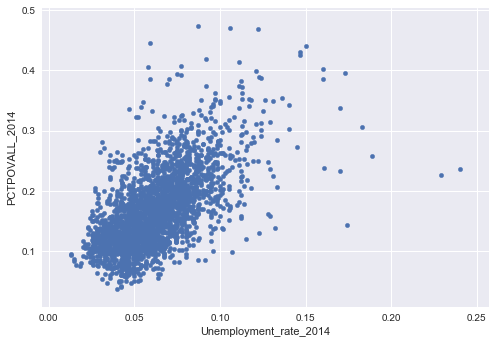

In [57]:
train_set. plot.scatter(x='Unemployment_rate_2014', y='PCTPOVALL_2014');

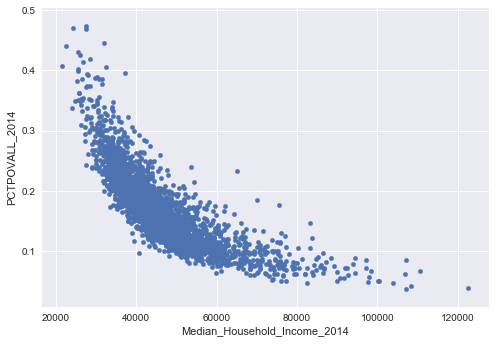

In [58]:
train_set. plot.scatter(x='Median_Household_Income_2014', y='PCTPOVALL_2014');

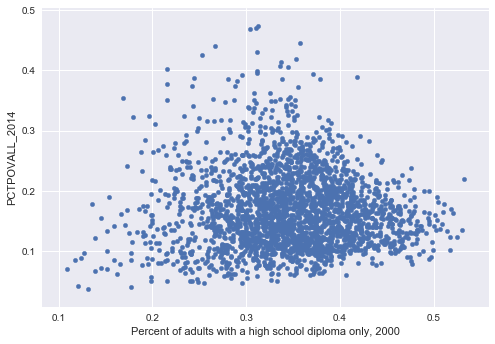

In [59]:
train_set. plot.scatter(x='Percent of adults with a high school diploma only, 2000', y='PCTPOVALL_2014');

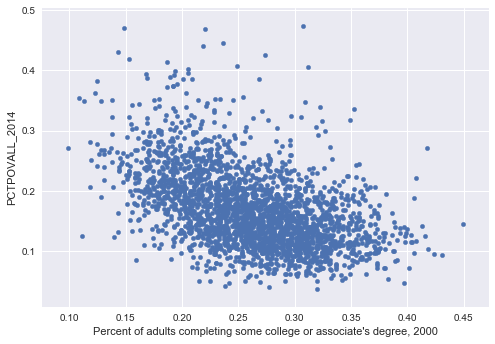

In [60]:
train_set. plot.scatter(x="Percent of adults completing some college or associate's degree, 2000", y='PCTPOVALL_2014');

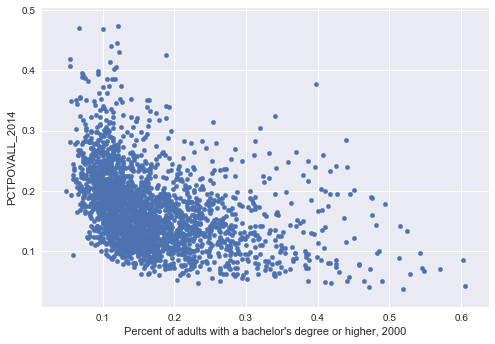

In [61]:
train_set. plot.scatter(x="Percent of adults with a bachelor's degree or higher, 2000", y='PCTPOVALL_2014');

Unemployment_rate_2014 and Median_Household_Income_2014 attributes show the most noticeable relationship with poverty rate. The relationship with unemployment rate seem linear and the relationship with household income seem polynomial.

Now, Let's look at correlation matrix between poverty rate and the attributes to see which one of them has the highest correlation and whether they confirm what we saw in the graphs or not.

In [62]:
corr_matrix = train_set.corr()
corr_matrix["PCTPOVALL_2014"].sort_values(ascending=False)

PCTPOVALL_2014                                                                1.000000
Unemployment_rate_2014                                                        0.609999
R_death_2014                                                                  0.251426
2013 Rural-urban Continuum Code                                               0.196222
Percent of adults with a high school diploma only, 2010-2014                  0.177143
2013 Urban Influence Code                                                     0.150642
R_birth_2014                                                                  0.119785
Economic_typology_2015                                                        0.016346
Percent of adults with a high school diploma only, 2000                      -0.040255
R_INTERNATIONAL_MIG_2014                                                     -0.066233
POP_ESTIMATE_2014                                                            -0.084792
Civilian_labor_force_2014                  

From the correlation matrix we can see that household income has the highest correlation (-0.79) and then the second one is unemployment rate that its correlation is 0.61.

## 4. Basic Models
Before going to more complicated machine learning techniques here I first use very simple models to see with what error we can estimate the poverty rate.

For one model I use median household income as the input and poverty rate as an output. For this model I first transform the input with polynomial transformation with degree 2 and output with standardscaler, then I use linear regression between transformed y1 and transformed X1.

For the second model I use unemployment rate as input and poverty rate as output and transform both inputs and outputs with standardscaler and then I use linear regression between them.

With these basic models we can see that the mean squared error for the first model is 0.25 and for the second model is 0.63. The following models are compared with these basic models to see whether we can have any improvements or not.

In [64]:
import warnings
warnings.filterwarnings("ignore") 
X1=np.array(train_set['Median_Household_Income_2014']).reshape(len(train_set['Median_Household_Income_2014']),1)
X2=np.array(train_set['Unemployment_rate_2014']).reshape(len(train_set['Median_Household_Income_2014']),1)
y1=np.array((train_set['PCTPOVALL_2014']))


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler = StandardScaler()


X2=scaler.fit_transform(X2)

y1=scaler.fit_transform(y1)


poly_features=PolynomialFeatures(degree=2)
X1= poly_features.fit_transform(X1)


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

scores = cross_val_score(lin_reg, X1, y1, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)


-0.24811651903755103

In [69]:
scores = cross_val_score(lin_reg, X2, y1, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)


-0.62911642965127668

## 5. Data Preprocessing Pipeline

Here I Create a scikit pipeline for preprocessing of the features and also lable data to prepare them for ML algorithms. This pipeline will:

-Standardize numerical variables
-Transform categorical variables by using OneHotEncoder or LabelBinarizer on them.


In [70]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, StandardScaler


from sklearn_pandas import DataFrameMapper




df_mapper = DataFrameMapper([
    ('State', LabelBinarizer()),
    (['2013 Rural-urban Continuum Code'], OneHotEncoder(n_values=10)),
    (['2013 Urban Influence Code'], OneHotEncoder(n_values=13)),
    (['Percent of adults with a high school diploma only, 1970'], StandardScaler()),
    (['Percent of adults completing some college (1-3 years), 1970'], StandardScaler()),
    (['Percent of adults completing four years of college or higher, 1970'], StandardScaler()),
    (['Percent of adults with a high school diploma only, 1980'], StandardScaler()),
    (['Percent of adults completing some college (1-3 years), 1980'], StandardScaler()),
    (['Percent of adults completing four years of college or higher, 1980'], StandardScaler()),
    (['Percent of adults with a high school diploma only, 1990'], StandardScaler()),
    (["Percent of adults completing some college or associate's degree, 1990"], StandardScaler()),
    (["Percent of adults with a bachelor's degree or higher, 1990"], StandardScaler()),
    (['Percent of adults with a high school diploma only, 2000'], StandardScaler()),
    (["Percent of adults completing some college or associate's degree, 2000"], StandardScaler()),
    (["Percent of adults with a bachelor's degree or higher, 2000"], StandardScaler()),
    (['Percent of adults with a high school diploma only, 2010-2014'], StandardScaler()),
    (["Percent of adults completing some college or associate's degree, 2010-2014"], StandardScaler()),
    (["Percent of adults with a bachelor's degree or higher, 2010-2014"], StandardScaler()),
    (['Economic_typology_2015'], OneHotEncoder(n_values=6)),
    (['POP_ESTIMATE_2014'], StandardScaler()),
    (['R_birth_2014'], StandardScaler()),
    (['R_death_2014'], StandardScaler()),
    (['R_INTERNATIONAL_MIG_2014'], StandardScaler()),
    (['R_DOMESTIC_MIG_2014'], StandardScaler()),
    (['Civilian_labor_force_2014'], StandardScaler()),
    (['Unemployment_rate_2014'], StandardScaler()),
    (['Median_Household_Income_2014'], StandardScaler()),
])


full_pipeline_feature = FeatureUnion(transformer_list=[
    ('df_mapper', df_mapper)
])

df_mapper_label=DataFrameMapper([( ['PCTPOVALL_2014'], StandardScaler())])
full_pipeline_label=FeatureUnion(transformer_list=[
    ('df_mapper_label', df_mapper_label)])

Here I define train set features and label and then transform them using the preprocessing pipeline.

In [71]:
train_set_labels = pd.DataFrame(train_set['PCTPOVALL_2014'].copy(), columns=["PCTPOVALL_2014"])
train_set_features = train_set.drop('PCTPOVALL_2014', axis=1)
train_set_features.head()

,State,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with a high school diploma only, 1990",...,"Percent of adults with a bachelor's degree or higher, 2010-2014",Economic_typology_2015,POP_ESTIMATE_2014,R_birth_2014,R_death_2014,R_INTERNATIONAL_MIG_2014,R_DOMESTIC_MIG_2014,Civilian_labor_force_2014,Unemployment_rate_2014,Median_Household_Income_2014
287,CO,9.0,10.0,0.307,0.103,0.175,0.398,0.177,0.243,0.320,...,0.270793,5.0,719,0.005642,0.001410,0.000000,0.021157,477.0,0.052,40006.0
516,GA,3.0,2.0,0.113,0.044,0.022,0.233,0.052,0.051,0.323,...,0.095960,2.0,8354,0.009146,0.011997,0.000713,-0.013066,2999.0,0.112,36886.0
2502,TN,8.0,6.0,0.176,0.023,0.024,0.287,0.048,0.050,0.378,...,0.081783,4.0,16842,0.009007,0.011437,0.000000,-0.000830,6473.0,0.086,33573.0
2731,TX,7.0,8.0,0.232,0.076,0.064,0.310,0.122,0.097,0.322,...,0.141821,3.0,32487,0.015028,0.007775,0.001537,-0.012539,12909.0,0.063,40680.0
1244,MI,5.0,8.0,0.352,0.138,0.105,0.371,0.209,0.191,0.322,...,0.308341,5.0,90796,0.010754,0.009017,0.000254,0.006295,48168.0,0.060,55592.0


In [72]:
train_set_labels.head()

,PCTPOVALL_2014
287,0.155
516,0.281
2502,0.233
2731,0.206
1244,0.097


In [73]:
import numpy as np
full_pipeline_feature.fit(train_set_features)
train_X = full_pipeline_feature.transform(train_set_features)
train_y=full_pipeline_label.fit_transform(train_set_labels)
train_y=np.ravel(train_y)


In [74]:
train_X.shape

(2498, 103)

In [75]:
train_y.shape

(2498,)

Here I define test set features and label and then transform them using the preprocessing pipeline.

In [78]:
test_set_labels = pd.DataFrame(test_set['PCTPOVALL_2014'].copy(), columns=["PCTPOVALL_2014"])
test_set_features = test_set.drop('PCTPOVALL_2014', axis=1)


In [80]:
full_pipeline_feature.fit(train_set_features)
test_X = full_pipeline_feature.transform(test_set_features)
test_y=full_pipeline_label.fit_transform(test_set_labels)
test_y=np.ravel(test_y)


In [81]:
test_X.shape

(625, 103)

In [82]:
test_y.shape

(625,)

## 6. Machine Learning Models

In this problem I should use supervised learning algorithms for regression problem.

Here I use several models with default parameters for now and use 10-fold cross validation to report mean squared error which is a good score in regression problems.

### 6.1. Linear Regression

Here the error is very high for linear regression. That's why I look at the scores and see that on most of the cross validation sets the errors are reasonable just on one of them the score is very high and that's why the mean is quite high. Definitely it's not a good model to be used in this problem.

In [83]:
import warnings
warnings.filterwarnings("ignore") 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()

scores = cross_val_score(lin_reg, train_X, train_y, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)

-2.108697109081346e+18

In [84]:
scores

array([ -1.55492493e-01,  -1.96431089e-01,  -1.90885096e-01,
        -1.35101417e-01,  -2.19504321e-01,  -1.51639246e-01,
        -1.81116574e-01,  -2.10869711e+19,  -1.63701408e-01,
        -1.39973169e-01])

### 6.2. Stochastic Gradient Descent

Here I use stochastic gradient descent.

In [85]:

from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor()

scores = cross_val_score(sgd_reg, train_X, train_y, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)

-0.17274549553962132

### 6.3. Polynomial Regression

Here I use polynomial regression. First I transform the features with polynomial transformation and then use a linear regression. The error is much better than the linear regression but it's still very high comparing with stochastic gradient descent.


In [86]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)
poly_train_X= poly_features.fit_transform(train_X)

lin_reg= LinearRegression()

scores = cross_val_score(lin_reg, poly_train_X, train_y, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)

-9.9064295639757347

### 6.4. Random Forest

Here I use random forest. The error is very good comparing with above models.

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()

scores = cross_val_score(rf_reg, train_X, train_y, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)

-0.14245422897133692

### 6.5. Linear SVR

Here I use linear svr model and the error is good.

In [88]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR()

scores = cross_val_score(linear_svr, train_X, train_y, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)

-0.17767401155002788

### 6.6. Non-linear SVR

Here I use RBF SVR model and the error is good.

In [89]:
from sklearn.svm import SVR

rbf_svr = SVR(kernel='rbf', gamma='auto')
rbf_svr.fit(train_X, train_y)
scores = cross_val_score(rbf_svr, train_X, train_y, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)

-0.13623780396340154

### 6.7. Regularized Linear Models

Here I use three regularized linear models: Ridge, Lasso and Elastic Net. Regularization on linear models is achieved by constraining the weights of the model. They perform much better than linear regression. 

### 6.7.1. Ridge Regression

In [90]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge()

scores = cross_val_score(ridge_reg, train_X, train_y, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)

-0.17107251673012311

### 6.7.2. Lasso Regression

In [91]:
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.1)
scores = cross_val_score(lasso_reg, train_X, train_y, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)

-0.2331628345529273

### 6.7.3. Elastic Net

In [92]:
from sklearn.linear_model import ElasticNet
elastic_net= ElasticNet(alpha=0.1, l1_ratio=0.5)
scores = cross_val_score(elastic_net, train_X, train_y, 
                         scoring='mean_squared_error', cv=10)
np.mean(scores)

-0.20984190401344377

## 7. Model Tuning

Based on the above analysis, I will choose Stochastic Gradient Descent, Random Forest, Linear SVR, RBF Non-linear SVR and Ridge Regression model to do further analysis and fit a tuned model:
    - I use 5-fold cross validation for model selection: I use GridSearchCV to find the best hyperparameters between the 
    options I provide for each one of them.
    - I use 10-fold cross validation for model assessment to see how much the error is on the train data set.
    
At the end of each model I use the best tuned model to find the error on the test data set.    
    


In [93]:
from sklearn.model_selection import GridSearchCV


### 7.1. Stochastic Gradient Descent

In [94]:
from sklearn.linear_model import SGDRegressor

sgd_param_grid = [
    {'n_iter': [100, 500, 1000,10000], 'alpha': [0.00001, 0.0001, 0.001,0.01,0.1]}
]
sgd_reg=SGDRegressor()

sgd_tuner = GridSearchCV(sgd_reg, sgd_param_grid, cv=5,
                        scoring='mean_squared_error', n_jobs=4)


sgd_tuner.fit(train_X, train_y)
print ("SGD_Best_params_MSE: ", sgd_tuner.best_params_)
print("Best SGD MSE score for Model Selection is {}".format(sgd_tuner.best_score_))


tuned_sgd_mse = cross_val_score(sgd_tuner, train_X, train_y,
                              scoring='mean_squared_error', cv=10)
print("Best SGD MSE score for Model Assessment is {}".format(np.mean(tuned_sgd_mse)))


SGD_Best_params_MSE:  {'alpha': 0.01, 'n_iter': 1000}
Best SGD MSE score for Model Selection is -0.17016998000841171
Best SGD MSE score for Model Assessment is -0.16989993608245912


In [95]:
pred_y = sgd_tuner.predict(test_X)
test_mse=mean_squared_error(test_y, pred_y)
print("SGD MSE score on test set is {}".format(test_mse))


SGD MSE score on test set is 0.14471226203894116


### 7.2. Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

rf_param_grid = [
    {'n_estimators': [30, 60, 90], 'max_features': [ 30, 50, 80]}
]

rf_reg=RandomForestRegressor()

rf_tuner = GridSearchCV(rf_reg, rf_param_grid, cv=5,
                        scoring='mean_squared_error', n_jobs=4)

rf_tuner.fit(train_X, train_y)
print ("rf_Best_params_MSE: ", rf_tuner.best_params_)
print("Best RF MSE score for Model Selection is {}".format(rf_tuner.best_score_))

tuned_rf_mse = cross_val_score(rf_tuner, train_X, train_y,
                              scoring='mean_squared_error', cv=10)

print("Best RF MSE score for Model Assessment is {}".format(np.mean(tuned_rf_mse)))



rf_Best_params_MSE:  {'max_features': 50, 'n_estimators': 90}
Best RF MSE score for Model Selection is -0.12939500840380486
Best RF MSE score for Model Assessment is -0.12539619675803304


In [97]:
pred_y = rf_tuner.predict(test_X)
test_mse=mean_squared_error(test_y, pred_y)
print("RF MSE score on test set is {}".format(test_mse))


RF MSE score on test set is 0.11685090718176097


### 7.3. Linear SVR

In [98]:
from sklearn.svm import LinearSVR

linear_svr_param_grid = [
    {'C': 2 ** np.linspace(-3, 5, num=5)}
]

linear_svr = LinearSVR()

linear_svr_tuner = GridSearchCV(linear_svr, linear_svr_param_grid, cv=5,
                        scoring='mean_squared_error', n_jobs=4)

linear_svr_tuner.fit(train_X, train_y)
print ("linear_svr_Best_params_MSE: ", linear_svr_tuner.best_params_)
print("Best Linear SVR MSE score for Model Selection is {}".format(linear_svr_tuner.best_score_))


tuned_linear_svr_mse = cross_val_score(linear_svr_tuner, train_X, train_y,
                              scoring='mean_squared_error', cv=10)

print("Best Linear SVR MSE score for Model Assessment is {}".format(np.mean(tuned_linear_svr_mse)))



linear_svr_Best_params_MSE:  {'C': 0.125}
Best Linear SVR MSE score for Model Selection is -0.1777971896186741
Best Linear SVR MSE score for Model Assessment is -0.17637035688236222


In [99]:
pred_y = linear_svr_tuner.predict(test_X)
test_mse=mean_squared_error(test_y, pred_y)
print("Linear SVR MSE score on test set is {}".format(test_mse))


Linear SVR MSE score on test set is 0.14746466264610197


### 7.4. RBF Non_linear SVR

In [100]:
from sklearn.svm import SVR

rbf_svr_param_grid = [
    {'C': 2 ** np.linspace(-3, 5, num=5)}
]

rbf_svr = SVR(kernel='rbf', gamma='auto')

rbf_svr_tuner = GridSearchCV(rbf_svr, rbf_svr_param_grid, cv=5,
                        scoring='mean_squared_error', n_jobs=4)

rbf_svr_tuner.fit(train_X, train_y)
print ("rbf_svr_Best_params_MSE: ", rbf_svr_tuner.best_params_)
print("Best RBF SVR MSE score for Model Selection is {}".format(rbf_svr_tuner.best_score_))


tuned_rbf_svr_mse = cross_val_score(rbf_svr_tuner, train_X, train_y,
                              scoring='mean_squared_error', cv=10)

print("Best RBF SVR MSE score for Model Assessment is {}".format(np.mean(tuned_rbf_svr_mse)))



rbf_svr_Best_params_MSE:  {'C': 8.0}
Best RBF SVR MSE score for Model Selection is -0.11869098204283239
Best RBF SVR MSE score for Model Assessment is -0.11667462656858414


In [101]:
pred_y = rbf_svr_tuner.predict(test_X)
test_mse=mean_squared_error(test_y, pred_y)
print("RBF SVR MSE score on test set is {}".format(test_mse))

RBF SVR MSE score on test set is 0.0954873542242913


### 7.5. Ridge Regression

In [102]:


from sklearn.linear_model import Ridge

ridge_reg_param_grid = [
    {'alpha': 2 ** np.linspace(-3, 5, num=5)}
]

ridge_reg= Ridge()

ridge_reg_tuner = GridSearchCV(ridge_reg, ridge_reg_param_grid, cv=5,
                        scoring='mean_squared_error', n_jobs=4)

ridge_reg_tuner.fit(train_X, train_y)
print ("ridge_reg_Best_params_MSE: ", ridge_reg_tuner.best_params_)
print("Best Ridge Regression MSE score for Model Selection is {}".format(ridge_reg_tuner.best_score_))

tuned_ridge_reg_mse = cross_val_score(ridge_reg_tuner, train_X, train_y,
                              scoring='mean_squared_error', cv=10)

print("Best Ridge Regression MSE score for Model Assessment is {}".format(np.mean(tuned_ridge_reg_mse)))



ridge_reg_Best_params_MSE:  {'alpha': 32.0}
Best Ridge Regression MSE score for Model Selection is -0.170642325090453
Best Ridge Regression MSE score for Model Assessment is -0.16914091127545153


In [103]:
pred_y = ridge_reg_tuner.predict(test_X)
test_mse=mean_squared_error(test_y, pred_y)
print("Ridge Reg MSE score on test set is {}".format(test_mse))

Ridge Reg MSE score on test set is 0.14354973358237155


### Between all the models I trained so far the best one is RBF Non_linear SVR with 0.095 MSE on test data set and the second best model is Random Forest with 0.117 MSE on test data set. Also, we can see that these models are much better than the basic models I trained at the beginning and it shows that it's worth training these complicated models.

## 8. Neural Network

Here I train single layer and deep neural network on the data to see how they are performing.


### 8.1. Single Layer Feed-Forward Neural Network

Here I train a single layer feed forward neural network using TensorFlow. I use Mean Squared Error as the loss function, and AdamOptimizer to train the model. At the end I report the Mean Squared Error of this model on the test set.



In [119]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.learn import SKCompat, Estimator    
tf.logging.set_verbosity(tf.logging.INFO)


def get_estimator(learning_rate=0.01, n_hidden1=30):
    return SKCompat(Estimator(model_fn=_model_fn, params={'learning_rate': learning_rate, 'n_hidden1': n_hidden1}))

def _model_fn(features, labels, mode, params):
    # one hiddern layers
    # and an output layer
    h1 = tf.layers.dense(features, params['n_hidden1'], activation=tf.nn.relu)
    out = tf.layers.dense(h1, 1, activation=None)        
    
    # reshape predictions
    predictions = tf.reshape(out, [-1])
    predictions_dict = {'afford': predictions}
    
    # 
    loss = tf.reduce_mean(tf.cast(tf.square(labels - predictions),tf.float32))

    train_op = tf.contrib.layers.optimize_loss(
            loss = loss,
            global_step = tf.contrib.framework.get_global_step(),
            learning_rate = params['learning_rate'],
            optimizer = tf.train.AdamOptimizer)
    
    return predictions, loss, train_op


slff_estimator = get_estimator()

# this runs the optimizer for one 1000 steps, using 10 observations in each step
slff_estimator.fit(train_X, train_y, batch_size=10, steps=1000)

# now, evaluate loss on the test set
slff_estimator.score(test_X, test_y)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023F02FEC320>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Elham\AppData\Local\Temp\tmpm4ez5edx\model.ckpt.
INFO:tensorflow:loss = 2.66987, step = 1
INFO:tensorflow:global_step/sec: 1282.14
INFO:tensorflow:loss = 0.311907, step = 101 (0.078 sec)
INFO:tensorflow:global_step/sec: 1449.46
INFO:tensorflow:loss = 0.304856, step = 201 (0.070 sec)
INFO:

{'global_step': 1000, 'loss': 0.13076301}

### 8.2. Deep Neural Network

Here I train a deep neural network with two or more hidden layers. Again, I use Mean Squared Error as the loss function, and the AdamOptimizer to train the model. I try to tune the number of hidden layers between 2 to 4, and also the number of units per layer. I use train-test-split function to create a validation set and see which parameters give the best results. Then I use best tuned model on the whole train set and train the model again and then use it on the test data sets to estimate the test set errors.

As the results show, the best tuned model is a model with 2 hidden layers, 30 units in the first hidden layer and 20 units in the second hidden layer.


In [139]:

import tensorflow as tf
import numpy as np
from tensorflow.contrib.learn import SKCompat, Estimator    
tf.logging.set_verbosity(tf.logging.ERROR)

DNN_train_X, DNN_test_X = train_test_split(train_X, test_size=0.2, random_state=1234)
DNN_train_y, DNN_test_y = train_test_split(train_y, test_size=0.2, random_state=1234)

n_hidden3=15
n_hidden4=10

def get_estimator(learning_rate=0.01, n_hidden1=30, n_hidden2=20, n_hidden3=15, n_hidden4=10, n_hid_layers=2):
    return SKCompat(Estimator(model_fn=_model_fn, params={'n_hid_layers':n_hid_layers,'learning_rate': learning_rate, 'n_hidden1': n_hidden1, 'n_hidden2': n_hidden2,'n_hidden3': n_hidden3,'n_hidden4': n_hidden4}))

def _model_fn(features, labels, mode, params):
    
    # total of 4 hiddern layers
    
    h1 = tf.layers.dense(features, params['n_hidden1'], activation=tf.nn.relu)
    h2 = tf.layers.dense(h1, params['n_hidden2'], activation=tf.nn.relu)
    h3 = tf.layers.dense(h2, params['n_hidden3'], activation=tf.nn.relu)
    h4 = tf.layers.dense(h3, params['n_hidden4'], activation=tf.nn.relu)
    
    # an output layer based on number of hidden layers
    
    if n_hid_layers==2:
        input_of_output=h2
    elif n_hid_layers==3:
        input_of_output=h3
    elif n_hid_layers==4:
        input_of_output=h4
        
    out = tf.layers.dense(input_of_output, 1, activation=None)        
    
    # reshape predictions
    predictions = tf.reshape(out, [-1])
    predictions_dict = {'afford': predictions}
    
    # 
    loss = tf.reduce_mean(tf.cast(tf.square(labels - predictions),tf.float32))

    train_op = tf.contrib.layers.optimize_loss(
            loss = loss,
            global_step = tf.contrib.framework.get_global_step(),
            learning_rate = params['learning_rate'],
            optimizer = tf.train.AdamOptimizer)
    
    return predictions, loss, train_op

def fit_score(learning_rate=0.01, n_hidden1=30, n_hidden2=20, n_hidden3=15, n_hidden4=10, n_hid_layers=2):
    DNN_estimator = get_estimator(learning_rate=learning_rate, n_hidden1=n_hidden1, n_hidden2=n_hidden2, 
                                  n_hidden3=n_hidden3, n_hidden4=n_hidden4, n_hid_layers=n_hid_layers)

    # this runs the optimizer for one 1000 steps, using 10 observations in each step
    DNN_estimator.fit(DNN_train_X, DNN_train_y, batch_size=10, steps=1000)

    # now, evaluate loss on the test set
    score=DNN_estimator.score(DNN_test_X, DNN_test_y)
    
        
    
    
    
    return (n_hid_layers,n_hidden1,n_hidden2,n_hidden3,n_hidden4,score['loss'])
    
best_n_hid_layers=0
best_n_hidden1=0
best_n_hidden2=0
best_n_hidden3=0
best_n_hidden4=0
best_score=100000


for n_hid_layers in {2}:
    for n_hidden1 in {30,40,50}:
        for n_hidden2 in {20,30}:
            
            (n_hid_layers,n_hidden1,n_hidden2,n_hidden3,n_hidden4,score)=fit_score( n_hid_layers=n_hid_layers, n_hidden1=n_hidden1, n_hidden2=n_hidden2,n_hidden3=n_hidden3, n_hidden4=n_hidden4)  

            if (score <= best_score):
                best_n_hid_layers=n_hid_layers
                best_n_hidden1=n_hidden1
                best_n_hidden2=n_hidden2
                best_n_hidden3=n_hidden3
                best_n_hidden4=n_hidden4
                best_score=score   
                        
                        
                        
for n_hid_layers in {3}:
    for n_hidden1 in {30,40,50}:
        for n_hidden2 in {20,30}:
            for n_hidden3 in {15,20}:


                (n_hid_layers,n_hidden1,n_hidden2,n_hidden3,n_hidden4,score)=fit_score( n_hid_layers=n_hid_layers, n_hidden1=n_hidden1, n_hidden2=n_hidden2,n_hidden3=n_hidden3, n_hidden4=n_hidden4)  

                if (score <= best_score):
                    best_n_hid_layers=n_hid_layers
                    best_n_hidden1=n_hidden1
                    best_n_hidden2=n_hidden2
                    best_n_hidden3=n_hidden3
                    best_n_hidden4=n_hidden4
                    best_score=score                           
                        
for n_hid_layers in {4}:
    for n_hidden1 in {30,40,50}:
        for n_hidden2 in {20,30}:
            for n_hidden3 in {15,20}:
                for n_hidden4 in {10,15}:

                    (n_hid_layers,n_hidden1,n_hidden2,n_hidden3,n_hidden4,score)=fit_score( n_hid_layers=n_hid_layers, n_hidden1=n_hidden1, n_hidden2=n_hidden2,n_hidden3=n_hidden3, n_hidden4=n_hidden4)  

                    if (score <= best_score):
                        best_n_hid_layers=n_hid_layers
                        best_n_hidden1=n_hidden1
                        best_n_hidden2=n_hidden2
                        best_n_hidden3=n_hidden3
                        best_n_hidden4=n_hidden4
                        best_score=score                        
                    



print("best_n_hid_layers:"+ str(best_n_hid_layers) + "\n")
print("best_n_hidden1:"+ str( best_n_hidden1) + "\n")
print("best_n_hidden2:"+ str(best_n_hidden2 )+ "\n")
if best_n_hid_layers>=3  :
    print("best_n_hidden3:"+ str(best_n_hidden3) + "\n")
if best_n_hid_layers==4:    
    print("best_n_hidden4:"+ str(best_n_hidden4) + "\n")
print("best_score on the Validation Set:"+ str(best_score) + "\n\n")   


# Build the best optimizer
Final_DNN_estimator = get_estimator(learning_rate=0.01, n_hidden1=best_n_hidden1, n_hidden2=best_n_hidden2, 
                                  n_hidden3=best_n_hidden3, n_hidden4=best_n_hidden4, n_hid_layers=best_n_hid_layers)

# this runs the optimizer on the whole train set for one 1000 steps, using 10 observations in each step 
Final_DNN_estimator.fit(train_X, train_y, batch_size=10, steps=1000)

# now, evaluate loss on the test set
test_score=Final_DNN_estimator.score(test_X, test_y)

print("best_score on the Test Set:"+ str(test_score) + "\n\n")   
    

best_n_hid_layers:2

best_n_hidden1:30

best_n_hidden2:20

best_score on the Validation Set:0.128025


best_score on the Test Set:{'loss': 0.12563553, 'global_step': 1000}




## 9. Conclusion

From the analysis I did in this project, we can see that machine learning models can predict the poverty rate better than a basic model. Also, from all the models that I trained, the best results belong to RBF Non-linear SVR and then to Random Forest. These two models perform better than the Neural Networks. I will choose RBF Non_linear SVR as my first option and then Random Forest as my second option to predict the Poverty Rate.
Here I will look at the scatter plot between test_y and predicted_y by RBF Non-linear SVR and Random Forest to see how these models are performing. 


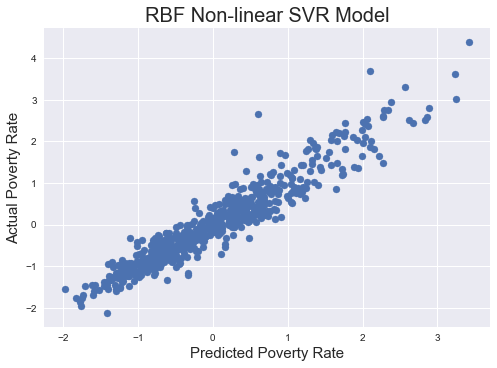

In [137]:
pred_y = rbf_svr_tuner.predict(test_X)
plt.scatter(x=pred_y, y=test_y)
plt.title("RBF Non-linear SVR Model" , fontsize=20)
plt.xlabel('Predicted Poverty Rate', fontsize=15)
plt.ylabel('Actual Poverty Rate', fontsize=15)

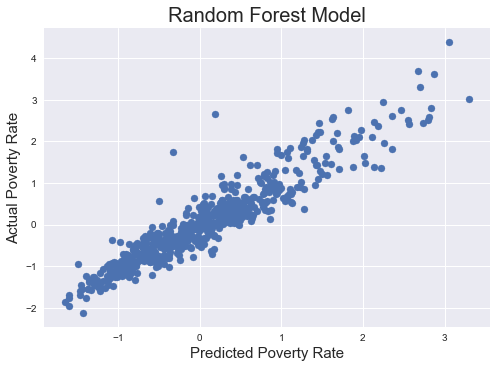

In [138]:
pred_y = rf_tuner.predict(test_X)
plt.scatter(x=pred_y, y=test_y)
plt.title("Random Forest Model", fontsize=20)
plt.xlabel('Predicted Poverty Rate', fontsize=15)
plt.ylabel('Actual Poverty Rate', fontsize=15)

From the above graphs we can see that these two models are performing very well at predicting the Poverty Rate.

## References:

https://www.ers.usda.gov/data-products/county-level-data-sets/documentation/

https://www.ers.usda.gov/data-products/county-typology-codes/descriptions-and-maps.aspx

https://data.world/finance/county-level-data-sets

https://docs.python.org/2/tutorial/

https://www.tensorflow.org/api_docs/python/

Hands-On Machine Learning with Scikit-Learn & TensorFlow Book, Aurelien Geron

